In [11]:
# =============================
# 🛠 SETUP
# =============================
#!pip install gym[atari] ale-py torch torchvision opencv-python --quiet

import gymnasium as gym
import ale_py
from tqdm.notebook import tqdm
from tqdm import tqdm
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
from collections import deque
from ale_py import ALEInterface, roms
import time
import matplotlib.pyplot as plt


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =============================
# 🎮 ENVIRONMENT
# =============================
ale = ALEInterface()
#ale.loadROM(roms.get_rom_path("breakout"))
env = gym.make("MountainCar-v0")

Using device: cuda


In [13]:
# Define the MLP Network
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [14]:
# =============================
# 🧹 PREPROCESS FRAME
# =============================
def preprocess_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame = cv2.resize(frame, (84, 84))
    return frame

In [ ]:
# JEŚLI KONTYNUUJEMY UCZENIE (jak trenujecie od zera do nie klikajcie)

# Rebuild the model architecture
policy_net = DQN(env.action_space.n).to(device)

# Load saved weights
policy_net.load_state_dict(torch.load("breakout_dqn.pth"))
policy_net.to(device)

# (Optional) Recreate the optimizer
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)


In [ ]:
# pobiera plik
from google.colab import files
files.download("breakout_dqn_2.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Episodes:   5%|▌         | 1/20 [00:00<00:05,  3.59episode/s]

Episode 1/20 — Reward: -200.00 — Epsilon: 1.000 — Time: 0.27 sec


Training Episodes:  10%|█         | 2/20 [00:00<00:06,  2.76episode/s]

Episode 2/20 — Reward: -200.00 — Epsilon: 0.999 — Time: 0.42 sec


Training Episodes:  15%|█▌        | 3/20 [00:01<00:06,  2.59episode/s]

Episode 3/20 — Reward: -200.00 — Epsilon: 0.998 — Time: 0.41 sec


Training Episodes:  20%|██        | 4/20 [00:01<00:06,  2.54episode/s]

Episode 4/20 — Reward: -200.00 — Epsilon: 0.997 — Time: 0.40 sec


Training Episodes:  25%|██▌       | 5/20 [00:01<00:06,  2.47episode/s]

Episode 5/20 — Reward: -200.00 — Epsilon: 0.996 — Time: 0.42 sec


Training Episodes:  30%|███       | 6/20 [00:02<00:05,  2.46episode/s]

Episode 6/20 — Reward: -200.00 — Epsilon: 0.995 — Time: 0.41 sec


Training Episodes:  35%|███▌      | 7/20 [00:02<00:05,  2.42episode/s]

Episode 7/20 — Reward: -200.00 — Epsilon: 0.994 — Time: 0.42 sec


Training Episodes:  40%|████      | 8/20 [00:03<00:04,  2.43episode/s]

Episode 8/20 — Reward: -200.00 — Epsilon: 0.993 — Time: 0.40 sec


Training Episodes:  45%|████▌     | 9/20 [00:03<00:04,  2.44episode/s]

Episode 9/20 — Reward: -200.00 — Epsilon: 0.992 — Time: 0.40 sec


Training Episodes:  50%|█████     | 10/20 [00:04<00:04,  2.43episode/s]

Episode 10/20 — Reward: -200.00 — Epsilon: 0.991 — Time: 0.42 sec


Training Episodes:  55%|█████▌    | 11/20 [00:04<00:03,  2.43episode/s]

Episode 11/20 — Reward: -200.00 — Epsilon: 0.990 — Time: 0.41 sec


Training Episodes:  60%|██████    | 12/20 [00:04<00:03,  2.39episode/s]

Episode 12/20 — Reward: -200.00 — Epsilon: 0.989 — Time: 0.43 sec


Training Episodes:  65%|██████▌   | 13/20 [00:05<00:02,  2.40episode/s]

Episode 13/20 — Reward: -200.00 — Epsilon: 0.988 — Time: 0.40 sec


Training Episodes:  70%|███████   | 14/20 [00:05<00:02,  2.38episode/s]

Episode 14/20 — Reward: -200.00 — Epsilon: 0.987 — Time: 0.43 sec


Training Episodes:  75%|███████▌  | 15/20 [00:06<00:02,  2.37episode/s]

Episode 15/20 — Reward: -200.00 — Epsilon: 0.986 — Time: 0.42 sec


Training Episodes:  80%|████████  | 16/20 [00:06<00:01,  2.35episode/s]

Episode 16/20 — Reward: -200.00 — Epsilon: 0.985 — Time: 0.43 sec


Training Episodes:  85%|████████▌ | 17/20 [00:06<00:01,  2.35episode/s]

Episode 17/20 — Reward: -200.00 — Epsilon: 0.984 — Time: 0.42 sec


Training Episodes:  90%|█████████ | 18/20 [00:07<00:00,  2.37episode/s]

Episode 18/20 — Reward: -200.00 — Epsilon: 0.983 — Time: 0.41 sec


Training Episodes:  95%|█████████▌| 19/20 [00:07<00:00,  2.38episode/s]

Episode 19/20 — Reward: -200.00 — Epsilon: 0.982 — Time: 0.41 sec


Training Episodes: 100%|██████████| 20/20 [00:08<00:00,  2.43episode/s]

Episode 20/20 — Reward: -200.00 — Epsilon: 0.981 — Time: 0.42 sec
Training finished ✅ — Model saved as 'mountaincar_dqn_test.pth'


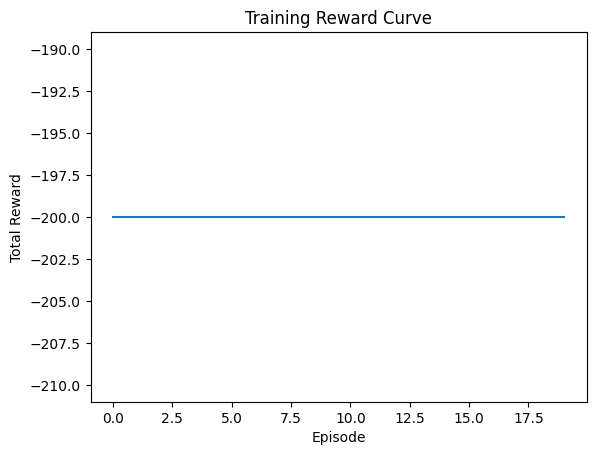

In [16]:

# Experience Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.array, zip(*batch))
        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

# Training function
def train_mountaincar(num_episodes=5000):
    env = gym.make("MountainCar-v0")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    policy_net = DQN(state_dim, action_dim).to(device)

    ###################################################################
    # HIPERPARAMETRY
    ###################################################################
    optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
    replay_buffer = ReplayBuffer(10000)
    batch_size = 64
    gamma = 0.99  # Discount factor
    epsilon_start = 1.0
    epsilon_final = 0.01
    epsilon_decay = 1000
    ###################################################################

    def epsilon_by_episode(episode):
        return epsilon_final + (epsilon_start - epsilon_final) * np.exp(-1. * episode / epsilon_decay)

    all_rewards = []

    for episode in tqdm(range(num_episodes), desc="Training Episodes", unit="episode"):
        start_time = time.time()
        state, _ = env.reset()  # Fix: unpack both state and info
        total_reward = 0
        done = False
        epsilon = epsilon_by_episode(episode)

        while not done:
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                q_values = policy_net(state_tensor)
                action = q_values.max(1)[1].item()

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            replay_buffer.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if len(replay_buffer) > batch_size:
                states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

                states = torch.FloatTensor(states).to(device)
                actions = torch.LongTensor(actions).to(device)
                rewards = torch.FloatTensor(rewards).to(device)
                next_states = torch.FloatTensor(next_states).to(device)
                dones = torch.FloatTensor(dones).to(device)

                q_values = policy_net(states)
                next_q_values = policy_net(next_states)

                q_value = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)
                next_q_value = next_q_values.max(1)[0]
                expected_q_value = rewards + gamma * next_q_value * (1 - dones)

                loss = (q_value - expected_q_value.detach()).pow(2).mean()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        all_rewards.append(total_reward)
        episode_time = time.time() - start_time
        tqdm.write(f"Episode {episode+1}/{num_episodes} — Reward: {total_reward:.2f} — Epsilon: {epsilon:.3f} — Time: {episode_time:.2f} sec")

    env.close()

    # Save the model
    torch.save(policy_net.state_dict(), "mountaincar_dqn_test.pth") # podmieńcie nazwę na taką jak chcecie
    print("Training finished ✅ — Model saved as 'mountaincar_dqn_test.pth'")

    return all_rewards

# Start training
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
all_rewards = train_mountaincar(num_episodes=20) # bierzcie minimum 5000 (w 30 min powinno dać rade, ustawcie środowisko wykonawcze T4-mega ważne)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Plot rewards
plt.plot(all_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Reward Curve')
plt.show()


In [ ]:
# pobiera plik z wagami modelu (wrzuca do pobranych na kompie)
from google.colab import files
files.download("mountaincar_dqn_test.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# ładuje model i odpala i nagrywa filmik z gry rozegranej przez model, (wrzućcie plik z modelem (.pth) do colaba)
import imageio

# Create the environment
env = gym.make("MountainCar-v0", render_mode='rgb_array')  # Specify render_mode
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
state, _ = env.reset()  # Reset the environment
done = False
total_reward = 0
frames = []

# Load the trained model
policy_net = DQN(state_dim, action_dim).to(device)
policy_net.load_state_dict(torch.load("mountaincar_dqn.pth"))
policy_net.eval()  # Set the model to evaluation mode

# Play the game using the trained model
while not done:
    # Get action from the model
    state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
    q_values = policy_net(state_tensor)
    action = q_values.max(1)[1].item()

    # Perform the action
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    total_reward += reward

    # Capture the frame (make sure it's in RGB format for saving)
    frames.append(env.render())  # This returns an RGB frame now
    state = next_state

env.close()

# Save the frames as a video
output_filename = "mountaincar_gameplay.mp4"
with imageio.get_writer(output_filename, fps=30) as writer:
    for frame in frames:
        writer.append_data(frame)

print(f"Video saved to {output_filename}")
print(f"Total reward: {total_reward}")


Video saved to mountaincar_gameplay.mp4
Total reward: -175.0


# Nowa sekcja

In [ ]:
# Pobiera na kompa filmik z gry i wrzuca do pobranych
from google.colab import files
# Download the saved video
files.download("/content/mountaincar_gameplay_test.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>